# Assignment

## Initialising spark session

In [1]:
from pyspark.sql import SparkSession # Importing SparkSession 
from pyspark.sql.types import IntegerType

import pandas as pd

# Required by plotting modules
%matplotlib inline


In [2]:
# Initialising Spark session
spark = SparkSession.builder.appName("Churn Analysis").getOrCreate()

## Step 1

Read the data Churn.csv into pyspark. 

In [3]:
# The path where churn.csv exits
filePath = "Churn.csv"

# The churn data frame is available in churnDF variable
churnDF = spark.read.format('com.databricks.spark.csv')\
               .option("header", "true")\
               .option("inferSchema", 'true')\
               .load(filePath)

In [4]:
# Check if data is read properly
churnDF.show(10)

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account Length|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Churn|Intl Plan|VMail Plan|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State|Area Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|    0|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|    0|  

In [5]:
# Checking the number of rows in given data
churnDF.count()

3333

In [6]:
# Since data is not that large, I will cache it.
churnDF.cache()

DataFrame[Account Length: int, VMail Message: int, Day Mins: double, Eve Mins: double, Night Mins: double, Intl Mins: double, CustServ Calls: int, Churn: int, Intl Plan: int, VMail Plan: int, Day Calls: int, Day Charge: double, Eve Calls: int, Eve Charge: double, Night Calls: int, Night Charge: double, Intl Calls: int, Intl Charge: double, State: string, Area Code: int, Phone: string]

## Step 2

Calculating summary statistics of variables.

In [7]:
# Lets do some descriptive statistics on this data
# Checking the schema of data
churnDF.printSchema()

root
 |-- Account Length: integer (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: double (nullable = true)
 |-- Eve Mins: double (nullable = true)
 |-- Night Mins: double (nullable = true)
 |-- Intl Mins: double (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Intl Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: double (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: double (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: double (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [8]:
# Using pandas dataframe function because it creates a prettier print
pd.DataFrame(churnDF.take(5), columns=churnDF.columns).transpose()

0         1         2         3         4
Account Length       128       107       137        84        75
VMail Message         25        26         0         0         0
Day Mins           265.1     161.6     243.4     299.4     166.7
Eve Mins           197.4     195.5     121.2      61.9     148.3
Night Mins         244.7     254.4     162.6     196.9     186.9
Intl Mins             10      13.7      12.2       6.6      10.1
CustServ Calls         1         1         0         2         3
Churn                  0         0         0         0         0
Intl Plan              0         0         0         1         1
VMail Plan             1         1         0         0         0
Day Calls            110       123       114        71       113
Day Charge         45.07     27.47     41.38      50.9     28.34
Eve Calls             99       103       110        88       122
Eve Charge         16.78     16.62      10.3      5.26     12.61
Night Calls           91       103       104        89       121
Night Charge       11.01     11.45      7.32      8.86      8.41
Intl Calls             3         3         5         7         3
Intl Charge          2.7       3.7      3.29      1.78      2.73
State                 KS        OH        NJ        OH        OK
Area Code            415       415       415       408       415
Phone           382-4657  371-7191  358-1921  375-9999  330-6626

In [9]:
# Performing summary statistics of variables.
churnDF.describe().toPandas().transpose()

0                    1                   2     3      4
summary         count                 mean              stddev   min    max
Account Length   3333   101.06480648064806  39.822105928595676     1    243
VMail Message    3333    8.099009900990099  13.688365372038598     0     51
Day Mins         3333   179.77509750975116   54.46738920237146   0.0  350.8
Eve Mins         3333   200.98034803480346  50.713844425811985   0.0  363.7
Night Mins       3333   200.87203720372048   50.57384701365836  23.2  395.0
Intl Mins        3333   10.237293729372933   2.791839548408416   0.0   20.0
CustServ Calls   3333   1.5628562856285628  1.3154910448664752     0      9
Churn            3333  0.14491449144914492   0.352067423624126     0      1
Intl Plan        3333   0.0969096909690969  0.2958791454844147     0      1
VMail Plan       3333  0.27662766276627665  0.4473978703800645     0      1
Day Calls        3333   100.43564356435644  20.069084207300893     0    165
Day Charge       3333   30.562307230723093   9.259434553930495   0.0  59.64
Eve Calls        3333   100.11431143114311   19.92262529394312     0    170
Eve Charge       3333   17.083540354035392   4.310667643110347   0.0  30.91
Night Calls      3333   100.10771077107711  19.568609346058544    33    175
Night Charge     3333    9.039324932493264   2.275872837660027  1.04  17.77
Intl Calls       3333   4.4794479447944795  2.4612142705460953     0     20
Intl Charge      3333    2.764581458145804  0.7537726126630451   0.0    5.4
Area Code        3333   437.18241824182417   42.37129048560661   408    510

## Step 3 and 4

- Plot histogram of various variables. 
- Plot relationship of various variables with churn variable to explore if there is some interaction between them and churn. 

In [10]:
# importing ploting libraries
import seaborn as sb

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


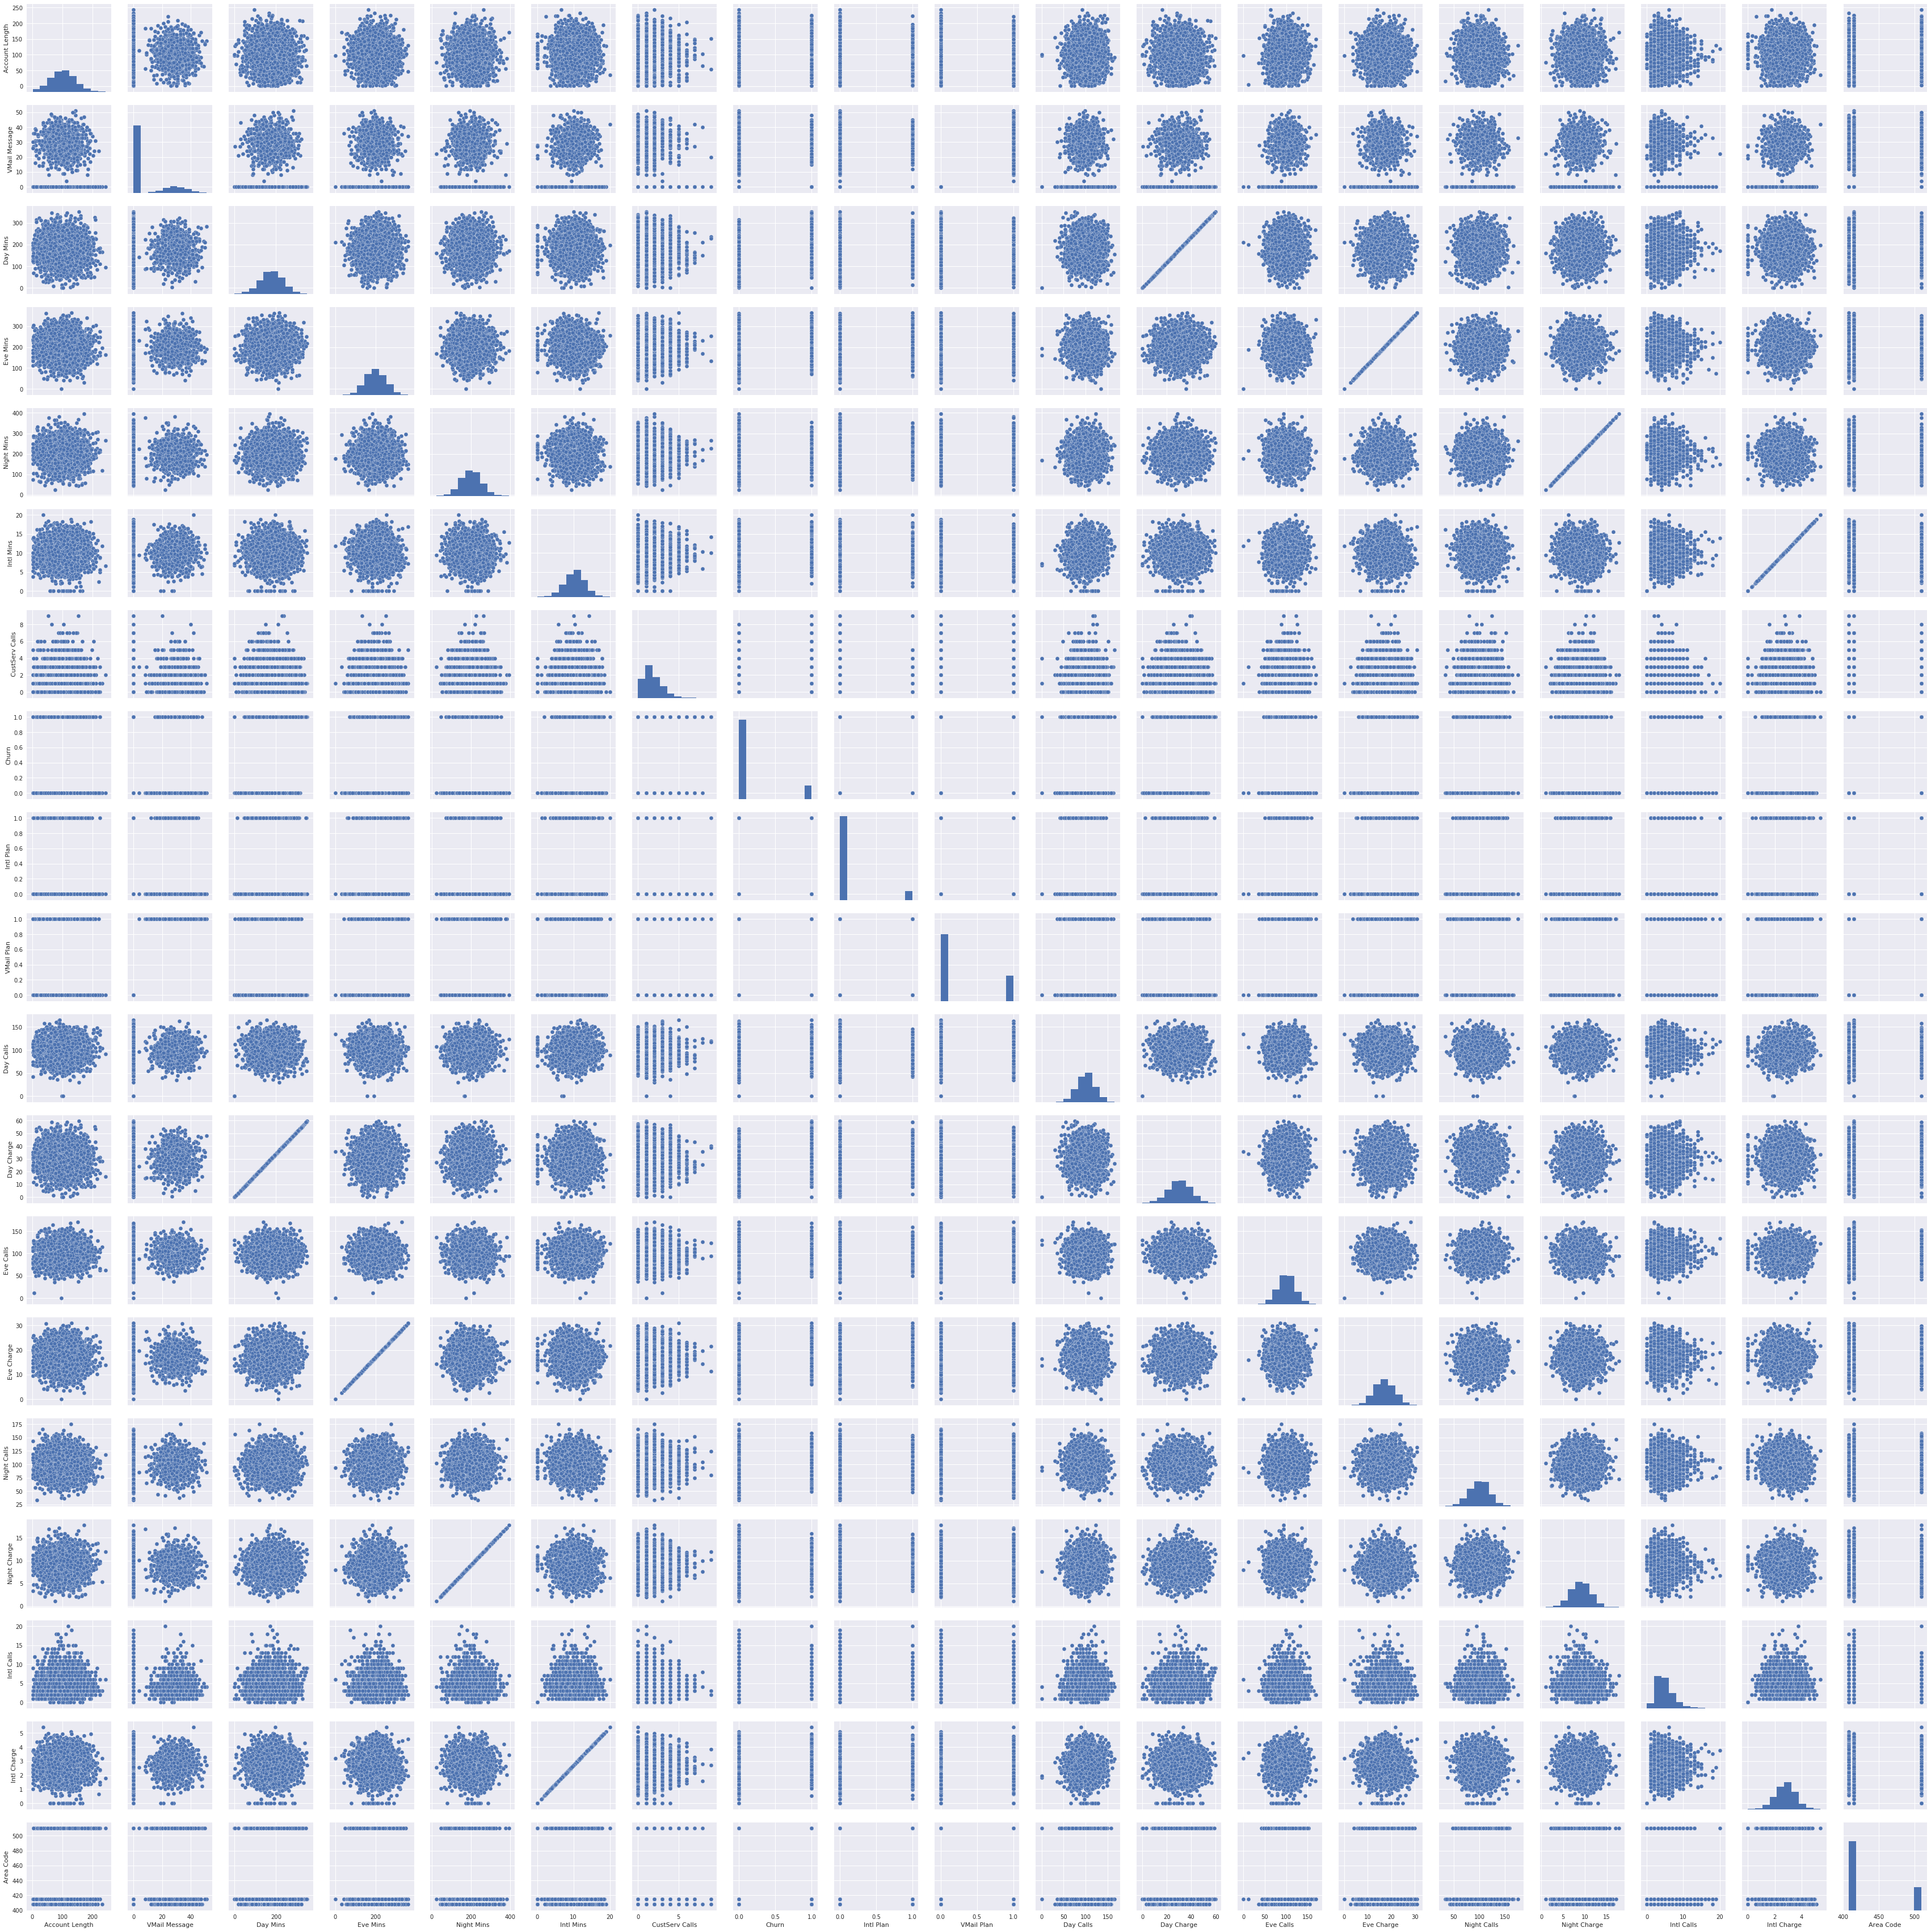

In [11]:
# Ploting a pairplot, this is a combined plot of many variables
plot = sb.pairplot(churnDF.toPandas())

> #### Observations
> - The diagonal graphs represent the histogram of various variables.
> - We can check the churn row in the above plot, for relationship of various variables with churn variable.
> - We can conclude from the graph that almost all the variables have some interaction between them and churn.
> - We can find a strong correlation between, Day Charge vs Day minutes, Evening Charge vs Evening minutes, Night Charge vs Night minutes and International Charge vs Intl minutes

## Step 5

Lets calculate correlation of the dependent variable(churn) with the independent variables. 

In [12]:
# Independent variables
indepVariables = ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 
                  'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls', 
                  'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 
                  'Intl Calls', 'Intl Charge']

# Calculating the pearsons correlation coefficient

for var in indepVariables:
    print("Correlation between Churn vs {} = {}".format(var, churnDF.corr("Churn", var)))

Correlation between Churn vs Account Length = 0.0165407422437
Correlation between Churn vs VMail Message = -0.0897279698351
Correlation between Churn vs Day Mins = 0.205150829261
Correlation between Churn vs Eve Mins = 0.0927957903126
Correlation between Churn vs Night Mins = 0.0354928534213
Correlation between Churn vs Intl Mins = 0.0682387756272
Correlation between Churn vs CustServ Calls = 0.208749998784
Correlation between Churn vs Intl Plan = 0.259851847345
Correlation between Churn vs VMail Plan = -0.10214814067
Correlation between Churn vs Day Calls = 0.0184593116086
Correlation between Churn vs Day Charge = 0.20515074317
Correlation between Churn vs Eve Calls = 0.00923313191308
Correlation between Churn vs Eve Charge = 0.0927860394287
Correlation between Churn vs Night Calls = 0.0061412030074
Correlation between Churn vs Night Charge = 0.0354955562405
Correlation between Churn vs Intl Calls = -0.0528443357741
Correlation between Churn vs Intl Charge = 0.0682586315039


> #### Insights
> - We are calculating persons correlation coefficient to test the correlation between churn and other variable, so basically testing the linear relation between churn and other independent variables.
> - We can clearly see that there is no strong linear relation between churn and any other variable.
> - This insight is also confirmed by the plot above.

## Step 6: Hypothesis testing

**Null Hypothesis H0**: There are no early indications available in the way a customer uses its service in predicting whether he/she is likely to churn.

**Alternate Hypothesis H1**: There are early indications available.

**Analysis:**

The **Null Hypothesis H0 is disproved**, as you can see from the plot in Step 4, that there is indeed relationship between churn and many other variables. So there are early indications available to predict whether he/she is likely to churn.

Therefore accepting the Alternate Hypothesis H1.

Clearly our exploratory data analysis on this data set has shown that this data has power to predict churn.

The following variables have the capability to predict churn strongly:

1. Account Length	
2. VMail Message	
3. Day Mins	
4. Eve Mins	
5. Night Mins	
6. Intl Mins	
7. CustServ Calls	
8. Intl Plan	
9. VMail Plan	
10. Day Calls	
11. Eve Calls	
12. Night Calls	
13. Intl Calls


- As there is a strong correlation between, Day Charge vs Day minutes, Evening Charge vs Evening minutes, Night Charge vs Night minutes and International Charge vs Intl minutes, I've Included only Minutes in each set.
    
- I've not included State, Area Code and Phone Number from my Domain knowledge and also these are string fields and will not provide any value to predictions. 